# 垃圾邮件文本分类
----
使用tensorflow 重新进行文本分类，最终在测试集上的损失率降低至0.17 准确率达到0.95以上。

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

代码开始时先引入需要的包，Python 为解释行语言，所以可以在任何地方引入想要的包。

import tensorflow as tf 

引入 tensorflow 这个包，并将这个包的名字重命名为 tf 这样就可以使用 tf.xxx 来调用 tf 包里的内容。


from tensorflow import keras

从tensorflow 中引入 keras 模块。 keras 中主要实现了高阶的机器学习网络模型，可以使网络的搭建更简单。

In [2]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)
train_data,train_label=load_data("./spambase_train.data")
test_data,test_label=load_data("./spambase_test.data")

定义了一个从文件中读取数据的函数。

In [3]:
len(test_data)

1377

In [4]:
train_data[10]

array([0.    , 0.42  , 0.42  , 0.    , 1.27  , 0.    , 0.42  , 0.    ,
       0.    , 1.27  , 0.    , 0.    , 0.    , 0.    , 0.    , 1.27  ,
       0.    , 0.    , 1.7   , 0.42  , 1.27  , 0.    , 0.    , 0.42  ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 1.27  , 0.    , 0.    , 0.42  ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.063 , 0.    , 0.572 , 0.063 , 0.    , 0.5659, 0.55  ,
       0.249 ])

keras 中的模型完全由 python 语言描述，相比之下，其它框架可能需要配置文件。

下面这个模型共两层，其中第一层共57个结点，激活函数为 softmax ，第二层只有1个结点，激活函数为sigmoid。

在模型定义好后需编译模型，这是可以选用优化器，损失函数和优化目标。这里使用的是对数损失函数，

最终设定超参数，让模型去适应训练集和测试集。其中，所有训练样本完成一次正向传播和反向传播称为一个epoch。 batch_size 为在使用随机梯度下降时一组数据的数据量。

In [5]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
layers.Dense(57, activation='softmax'),
layers.Dense(1, activation='sigmoid')])

In [6]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_data,
                    train_label,
                    epochs=40,
                    batch_size=100,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 1s 177us/step - loss: 0.6893 - acc: 0.6334 - val_loss: 0.6779 - val_acc: 0.8170
Epoch 2/40
3224/3224 [==============================] - 0s 28us/step - loss: 0.6709 - acc: 0.7829 - val_loss: 0.6589 - val_acc: 0.8017
Epoch 3/40
3224/3224 [==============================] - 0s 31us/step - loss: 0.6520 - acc: 0.7832 - val_loss: 0.6380 - val_acc: 0.8206
Epoch 4/40
3224/3224 [==============================] - 0s 32us/step - loss: 0.6312 - acc: 0.8151 - val_loss: 0.6150 - val_acc: 0.8453
Epoch 5/40
3224/3224 [==============================] - 0s 29us/step - loss: 0.6092 - acc: 0.8396 - val_loss: 0.5914 - val_acc: 0.8758
Epoch 6/40
3224/3224 [==============================] - 0s 34us/step - loss: 0.5866 - acc: 0.8583 - val_loss: 0.5677 - val_acc: 0.8911
Epoch 7/40
3224/3224 [==============================] - 0s 30us/step - loss: 0.5640 - acc: 0.8775 - val_loss: 0.5443 - val_acc: 0.8991
Epoch 

In [8]:
history_dict = history.history
history_dict.keys()
dict_keys=['loss', 'val_loss', 'val_acc', 'acc']

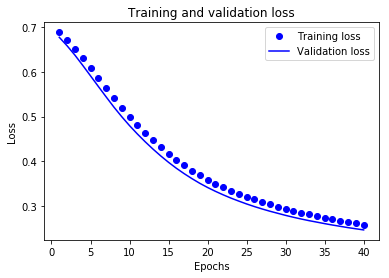

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

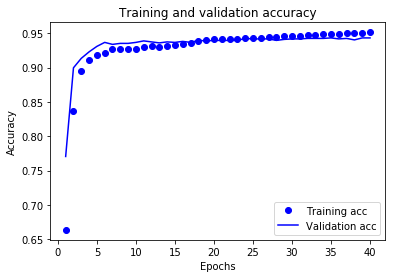

In [10]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
predictions = model.predict(train_data)

In [26]:
def load_prediction_data(file_path):
    data=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            sample=np.array([float(feature) for feature in sample])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data)
prediction_data=load_prediction_data(".\get_the_flag.data")

In [27]:
predictions = model.predict(prediction_data)

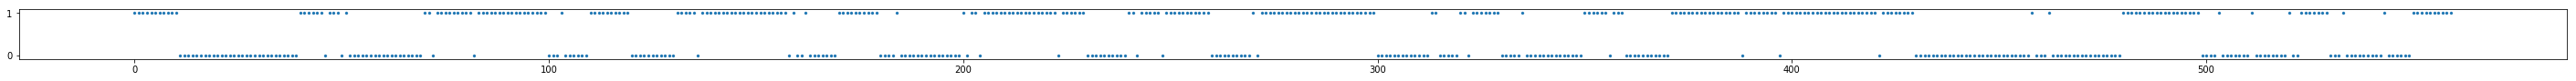

In [32]:
data_show=[]
for i in predictions:
    if i[0]<0.5:
        data_show.append(0)
    else:
        data_show.append(1)
plt.rcParams['figure.figsize'] = (50.0, 1.0) 
plt.scatter(range(len(data_show)),data_show,linewidth=0.1,s=10)
plt.show()